In [1]:
# load the necessary packages  
import time
start_time = time.time() 
import numpy as np    
import pandas as pd  
import scipy.stats as stats 
from scipy.stats import zscore 
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib.cm as cm
from matplotlib.gridspec import GridSpec
import seaborn as sns   
sns.set(color_codes=True)
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image   
import pydotplus
import graphviz
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB  
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import RandomForestClassifier 
import xgboost as xgb 
xgb.set_config (verbosity=0)
from xgboost import XGBClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn import preprocessing
from sklearn.metrics import average_precision_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import roc_curve 
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV 
from hyperopt import hp
from sklearn.impute import SimpleImputer 
from sklearn.impute import KNNImputer  
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import LabelBinarizer 
from sklearn.preprocessing import Normalizer   
from sklearn.preprocessing import OneHotEncoder 
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from pyspark.ml.feature import StringIndexer 
import statsmodels.formula.api as sm 
import math 
import pickle
import joblib
import os
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe 
from flask import Flask, request, jsonify 
import requests
import json 
from collections import Counter
random_state = np.random.RandomState(0) 
from sklearn.feature_extraction.text import CountVectorizer   
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import RobustScaler
import copy 
import warnings 
warnings.filterwarnings('ignore')    

In [2]:
# Part A 
# Domain: Telecom

In [3]:
# 1. Data Understanding & Exploration

In [4]:
# Part A 1(A) 
# Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable 
# Solution 
TelcomCustomerChurn_1 = pd.read_csv ('TelcomCustomer-Churn_1.csv')
TelcomCustomerChurn_1_New = pd.DataFrame(TelcomCustomerChurn_1)

In [5]:
# Part A 1(B) 
# Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable. 
TelcomCustomerChurn_2 = pd.read_csv ('TelcomCustomer-Churn_2.csv')
TelcomCustomerChurn_2_New = pd.DataFrame(TelcomCustomerChurn_2) 

In [6]:
# Part A 1(C) 
# Merge both the DataFrames on key ‘customerID’ to form a single DataFrame
# Solution 
TelcomCustomerChurn = pd.merge(TelcomCustomerChurn_1_New,TelcomCustomerChurn_2_New, on='customerID')

In [7]:
# Part A 1(D) 
# Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python

In [8]:
# Solution  
columns = list(map(lambda x: list(x.columns),[TelcomCustomerChurn_1_New,TelcomCustomerChurn_2_New,TelcomCustomerChurn]))
data = pd.DataFrame(columns)
data = data.fillna("") 
data.drop_duplicates(keep="first", inplace=True)
if len(data) > 1:
  print("DIFFERENT COLUMNS") 

DIFFERENT COLUMNS


In [9]:
TelcomCustomerChurn_1_New.columns  

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity'],
      dtype='object')

In [10]:
TelcomCustomerChurn_2_New.columns 

Index(['customerID', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
TelcomCustomerChurn.columns 

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
# Method 1: (For verifying that all the columns are incorporated in the merged DataFrame) 

In [13]:
# Columns in TelcomCustomerChurn_1_New not in the merged dataframe TelcomCustomerChurn
TelcomCustomerChurn_1_New.columns.difference(TelcomCustomerChurn.columns) 

Index([], dtype='object')

In [14]:
# Columns in TelcomCustomerChurn_2_New not in merged dataframe TelcomCustomerChurn
TelcomCustomerChurn_2_New.columns.difference(TelcomCustomerChurn.columns)  

Index([], dtype='object')

In [15]:
# The empty index shows that all the columns in TelcomCustomerChurn_1_New and TelcomCustomerChurn_2_New 
# are incorporated in the merged dataFrame TelcomCustomerChurn

In [16]:
# Method 2: (For verifying that all the columns are incorporated in the merged DataFrame) 

In [17]:
# Using Set theory 
Union = set(TelcomCustomerChurn_1_New.columns).union(set(TelcomCustomerChurn_2_New.columns)) 
print(Union)

{'InternetService', 'Contract', 'OnlineBackup', 'PhoneService', 'OnlineSecurity', 'tenure', 'gender', 'StreamingTV', 'Dependents', 'Partner', 'TechSupport', 'StreamingMovies', 'DeviceProtection', 'MultipleLines', 'TotalCharges', 'Churn', 'SeniorCitizen', 'customerID', 'PaymentMethod', 'MonthlyCharges', 'PaperlessBilling'}


In [18]:
MergedDataframe = set(TelcomCustomerChurn.columns)
print(MergedDataframe)

{'tenure', 'TechSupport', 'StreamingMovies', 'MultipleLines', 'customerID', 'PaymentMethod', 'InternetService', 'Contract', 'OnlineBackup', 'PhoneService', 'OnlineSecurity', 'gender', 'StreamingTV', 'Dependents', 'Partner', 'DeviceProtection', 'TotalCharges', 'Churn', 'SeniorCitizen', 'MonthlyCharges', 'PaperlessBilling'}


In [19]:
if (Union == MergedDataframe):
    print("True")
else:
    print("False")

True


In [20]:
# Hence, all the columns of TelcomCustomerChurn_1_New and TelcomCustomerChurn_2_New were incorporated in the merged 
# dataframe TelcomCustomerChurn

In [21]:
# 2. Data Cleaning & Analysis:

In [22]:
# Part A 2(A) 
# Impute missing/unexpected values in the DataFrame 

In [23]:
TelcomCustomerChurn.shape   

(7043, 21)

In [24]:
TelcomCustomerChurn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [25]:
TelcomCustomerChurn.notnull().count()  

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

In [26]:
# There are no null values in the dataset 

In [27]:
TelcomCustomerChurn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [28]:
# Here, we found an anomaly in TotalCharges datatype. Ideally, it should have been Float but it was idenifed as 
# Object datatype. Upon closer inspection, I found that the TotalCharges column has blank data which Python was unable 
# to detect as null values. That may have resulted in TotalCharges datatype being tagged as Object in lieu of Float. 

In [29]:
# Replacing the blank values with nan
TelcomCustomerChurn1 = TelcomCustomerChurn.replace(r'^\s*$', np.nan, regex=True)

In [30]:
TelcomCustomerChurn1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [31]:
# TelcomCustomerChurn1['TotalCharges'] has 7032 non null values

In [32]:
TelcomCustomerChurn1['TotalCharges'].isnull().sum() 

11

In [33]:
# 11 observations in TelcomCustomerChurn1['TotalCharges'] are Null
# As MonthlyCharges data is given corresponding the missing TotalCharges, so we can't impute 0 in place of Null values
# Proportion of null values 

In [34]:
11/7043

0.001561834445548772

In [35]:
# A paltry 0.16% of the observations is null. As few instances contain missing values, removing them from the dataset won't be
# a cause of worry. 
# The missing values in TelcomCustomerChurn1['TotalCharges'] is a Missing at Random data. 
# As per Wikipedia, 'Missing at random (MAR) occurs when the missingness is not random, but where missingness can be fully 
# accounted for by variables where there is complete information.'
# Its essentially a recording error. 

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

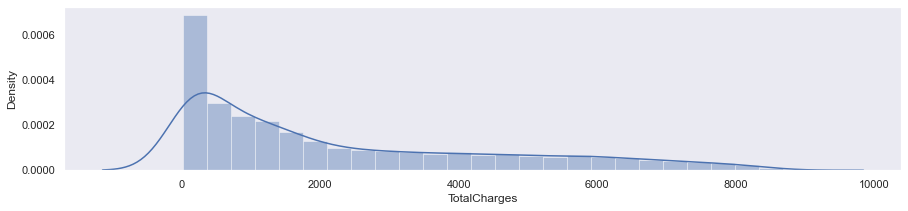

In [36]:
# Distribution of TelcomCustomerChurn1['TotalCharges']
ax = plt.subplots(figsize=(15,3))      
plt.grid(False)
sns.distplot(TelcomCustomerChurn1.TotalCharges)

In [37]:
# TelcomCustomerChurn1['TotalCharges'] is a skewed distribution, hence Median can be used as substitute for 
# imputation of missing values 

In [38]:
imputer = SimpleImputer(strategy='median', missing_values=np.nan)
imputer = imputer.fit(TelcomCustomerChurn1[['TotalCharges']])
TelcomCustomerChurn1[['TotalCharges']] = imputer.transform(TelcomCustomerChurn1[['TotalCharges']])
TelcomCustomerChurn1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [39]:
TelcomCustomerChurn1['TotalCharges'].median()

1397.475

In [40]:
# TelcomCustomerChurn1 has no null values as we have substituted the null values in TelcomCustomerChurn1['TotalCharges'] with 
# Median. The data type of TotalCharges changes to Float from Object. 

In [41]:
# Dropping TelcomCustomerChurn1(['SeniorCitizen'] as it's Boolean. Summary statistics on Boolean data does not make sense.  
TelcomCustomerChurn1.drop(['SeniorCitizen'], axis=1).columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [42]:
TelcomCustomerChurn1.drop(['SeniorCitizen'], axis=1).describe(exclude=['object']).transpose()

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.000,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.350,89.85,118.75
TotalCharges,7043.0,2281.916928,2265.270398,18.80,402.225,1397.475,3786.60,8684.80


In [43]:
# Resultant merged dataframe after imputation of missing values 
TelcomCustomerChurn1.columns 

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [44]:
# Part A 2(B) 
# Make sure all the variables with continuous values are of ‘Float’ type

In [45]:
# Solution
TelcomCustomerChurn1.MonthlyCharges = TelcomCustomerChurn1.MonthlyCharges.astype(float)
TelcomCustomerChurn1.MonthlyCharges

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64

In [46]:
TelcomCustomerChurn1.TotalCharges = TelcomCustomerChurn1.TotalCharges.astype(float)
TelcomCustomerChurn1.TotalCharges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [47]:
# Part A 2(C) 
# Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. 
# Cearly show percentage distribution in the pie-chart. 

In [48]:
# Solution 
TelcomCustomerChurn1.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [49]:
# We can use the ‘Counter’ method from the collections module in order to get an idea of the distribution in 
# categorical values. All variables except Customer ID with Object datatype are taken into considertaion  

Counter({'Male': 3555, 'Female': 3488})


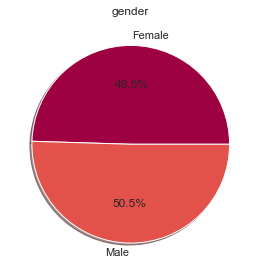

In [50]:
print(Counter(TelcomCustomerChurn1['gender']))
gender_1 = TelcomCustomerChurn1.groupby('gender').agg('count')
gender_labels = gender_1.customerID.sort_values().index 
gender_counts = gender_1.customerID.sort_values()
plt.figure(1, figsize=(20,10)) 
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='gender')
plt.pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

Counter({'No': 3641, 'Yes': 3402})


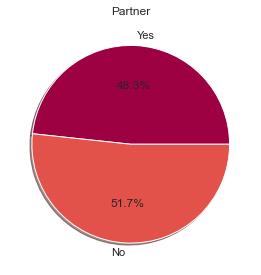

In [51]:
print(Counter(TelcomCustomerChurn1['Partner']))
Partner_1 = TelcomCustomerChurn1.groupby('Partner').agg('count')
Partner_labels = Partner_1.customerID.sort_values().index 
Partner_counts = Partner_1.customerID.sort_values()
plt.figure(1, figsize=(20,10)) 
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Partner')
plt.pie(Partner_counts, labels=Partner_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

Counter({'No': 4933, 'Yes': 2110})


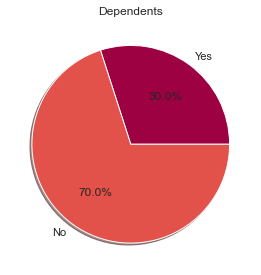

In [52]:
print(Counter(TelcomCustomerChurn1['Dependents']))
Dependents_1 = TelcomCustomerChurn1.groupby('Dependents').agg('count')
Dependents_labels = Dependents_1.customerID.sort_values().index 
Dependents_counts = Dependents_1.customerID.sort_values()
plt.figure(1, figsize=(20,10)) 
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Dependents')
plt.pie(Dependents_counts, labels=Dependents_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

Counter({'Yes': 6361, 'No': 682})


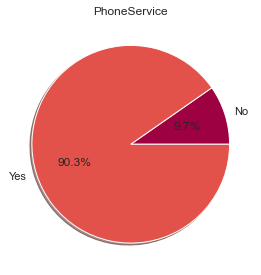

In [53]:
print(Counter(TelcomCustomerChurn1['PhoneService']))
PhoneService_1 = TelcomCustomerChurn1.groupby('PhoneService').agg('count')
PhoneService_labels = PhoneService_1.customerID.sort_values().index 
PhoneService_counts = PhoneService_1.customerID.sort_values()
plt.figure(1, figsize=(20,10)) 
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='PhoneService')
plt.pie(PhoneService_counts, labels=PhoneService_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

Counter({'No': 3390, 'Yes': 2971, 'No phone service': 682})


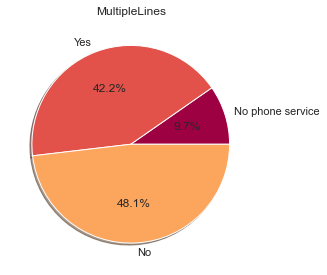

In [54]:
print(Counter(TelcomCustomerChurn1['MultipleLines']))
MultipleLines_1 = TelcomCustomerChurn1.groupby('MultipleLines').agg('count')
MultipleLines_labels = MultipleLines_1.customerID.sort_values().index 
MultipleLines_counts = MultipleLines_1.customerID.sort_values()
plt.figure(1, figsize=(20,10)) 
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='MultipleLines') 
plt.pie(MultipleLines_counts, labels=MultipleLines_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

Counter({'Fiber optic': 3096, 'DSL': 2421, 'No': 1526})


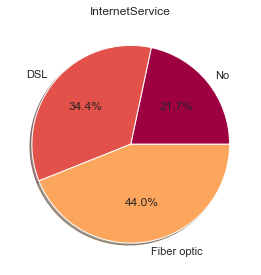

In [55]:
print(Counter(TelcomCustomerChurn1['InternetService']))
InternetService_1 = TelcomCustomerChurn1.groupby('InternetService').agg('count')
InternetService_labels = InternetService_1.customerID.sort_values().index 
InternetService_counts = InternetService_1.customerID.sort_values()
plt.figure(1, figsize=(20,10)) 
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='InternetService') 
plt.pie(InternetService_counts, labels=InternetService_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

Counter({'No': 3498, 'Yes': 2019, 'No internet service': 1526})


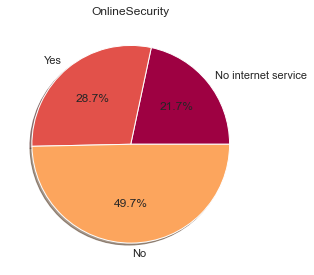

In [56]:
print(Counter(TelcomCustomerChurn1['OnlineSecurity']))
OnlineSecurity_1 = TelcomCustomerChurn1.groupby('OnlineSecurity').agg('count')
OnlineSecurity_labels = OnlineSecurity_1.customerID.sort_values().index 
OnlineSecurity_counts = OnlineSecurity_1.customerID.sort_values()
plt.figure(1, figsize=(20,10)) 
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='OnlineSecurity') 
plt.pie(OnlineSecurity_counts, labels=OnlineSecurity_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

Counter({'No': 3088, 'Yes': 2429, 'No internet service': 1526})


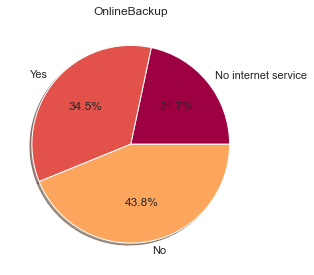

In [57]:
print(Counter(TelcomCustomerChurn1['OnlineBackup']))
OnlineBackup_1 = TelcomCustomerChurn1.groupby('OnlineBackup').agg('count')
OnlineBackup_labels = OnlineBackup_1.customerID.sort_values().index 
OnlineBackup_counts = OnlineBackup_1.customerID.sort_values()
plt.figure(1, figsize=(20,10)) 
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='OnlineBackup') 
plt.pie(OnlineBackup_counts, labels=OnlineBackup_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

Counter({'No': 3095, 'Yes': 2422, 'No internet service': 1526})


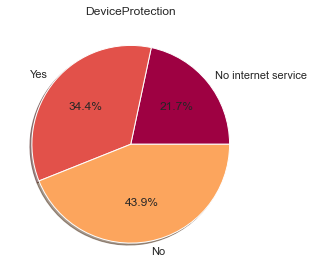

In [58]:
print(Counter(TelcomCustomerChurn1['DeviceProtection']))
DeviceProtection_1 = TelcomCustomerChurn1.groupby('DeviceProtection').agg('count')
DeviceProtection_labels = DeviceProtection_1.customerID.sort_values().index 
DeviceProtection_counts = DeviceProtection_1.customerID.sort_values()
plt.figure(1, figsize=(20,10)) 
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='DeviceProtection') 
plt.pie(DeviceProtection_counts, labels=DeviceProtection_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

Counter({'No': 3473, 'Yes': 2044, 'No internet service': 1526})


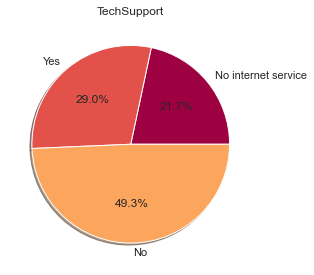

In [59]:
print(Counter(TelcomCustomerChurn1['TechSupport']))
TechSupport_1 = TelcomCustomerChurn1.groupby('TechSupport').agg('count')
TechSupport_labels = TechSupport_1.customerID.sort_values().index 
TechSupport_counts = TechSupport_1.customerID.sort_values()
plt.figure(1, figsize=(20,10)) 
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='TechSupport') 
plt.pie(TechSupport_counts, labels=TechSupport_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

Counter({'No': 2810, 'Yes': 2707, 'No internet service': 1526})


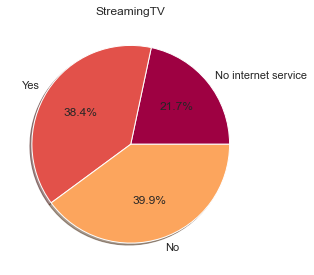

In [60]:
print(Counter(TelcomCustomerChurn1['StreamingTV']))
StreamingTV_1 = TelcomCustomerChurn1.groupby('StreamingTV').agg('count')
StreamingTV_labels = StreamingTV_1.customerID.sort_values().index 
StreamingTV_counts = StreamingTV_1.customerID.sort_values()
plt.figure(1, figsize=(20,10)) 
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='StreamingTV') 
plt.pie(StreamingTV_counts, labels=StreamingTV_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

Counter({'No': 2785, 'Yes': 2732, 'No internet service': 1526})


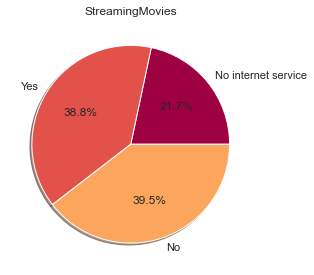

In [61]:
print(Counter(TelcomCustomerChurn1['StreamingMovies']))
StreamingMovies_1 = TelcomCustomerChurn1.groupby('StreamingMovies').agg('count')
StreamingMovies_labels = StreamingMovies_1.customerID.sort_values().index 
StreamingMovies_counts = StreamingMovies_1.customerID.sort_values()
plt.figure(1, figsize=(20,10)) 
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='StreamingMovies') 
plt.pie(StreamingMovies_counts, labels=StreamingMovies_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

Counter({'Month-to-month': 3875, 'Two year': 1695, 'One year': 1473})


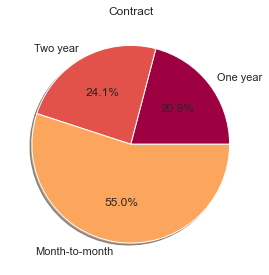

In [62]:
print(Counter(TelcomCustomerChurn1['Contract']))
Contract_1 = TelcomCustomerChurn1.groupby('Contract').agg('count')
Contract_labels = Contract_1.customerID.sort_values().index 
Contract_counts = Contract_1.customerID.sort_values()
plt.figure(1, figsize=(20,10)) 
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Contract') 
plt.pie(Contract_counts, labels=Contract_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

Counter({'Yes': 4171, 'No': 2872})


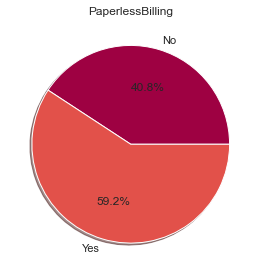

In [63]:
print(Counter(TelcomCustomerChurn1['PaperlessBilling']))
PaperlessBilling_1 = TelcomCustomerChurn1.groupby('PaperlessBilling').agg('count')
PaperlessBilling_labels = PaperlessBilling_1.customerID.sort_values().index 
PaperlessBilling_counts = PaperlessBilling_1.customerID.sort_values()
plt.figure(1, figsize=(20,10)) 
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='PaperlessBilling') 
plt.pie(PaperlessBilling_counts, labels=PaperlessBilling_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

Counter({'Electronic check': 2365, 'Mailed check': 1612, 'Bank transfer (automatic)': 1544, 'Credit card (automatic)': 1522})


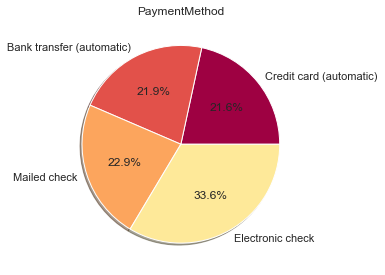

In [64]:
print(Counter(TelcomCustomerChurn1['PaymentMethod'])) 
PaymentMethod_1 = TelcomCustomerChurn1.groupby('PaymentMethod').agg('count')
PaymentMethod_labels = PaymentMethod_1.customerID.sort_values().index 
PaymentMethod_counts = PaymentMethod_1.customerID.sort_values()
plt.figure(1, figsize=(20,10)) 
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='PaymentMethod') 
plt.pie(PaymentMethod_counts, labels=PaymentMethod_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

Counter({'No': 5174, 'Yes': 1869})


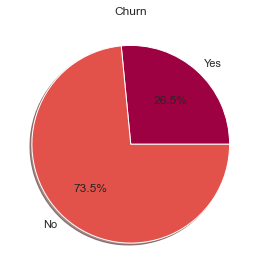

In [65]:
print(Counter(TelcomCustomerChurn1['Churn'])) 
Churn_1 = TelcomCustomerChurn1.groupby('Churn').agg('count')
Churn_labels = Churn_1.customerID.sort_values().index 
Churn_counts = Churn_1.customerID.sort_values()
plt.figure(1, figsize=(20,10)) 
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')  
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Churn') 
plt.pie(Churn_counts, labels=Churn_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [66]:
# Part A 2(D) 
# Share insights for Q2.c. 
# Solution
# The distribution of male and female customers are almost same
# In 48% of the cases, the customer's partner is also a customer 
# 70% of the customers are not dependents 
# 90% of the customers have opted for phone service 
# 42% of the customers have opted for multiple lines 
# 78% of the customers have opted for internet service. 44% have opted for fiber optic and 34% have opted for DSL
# Almost 29% of the customers have opted for Online security 
# Almost 35% of the customers have opted for Online backup
# Almost 35% of the customers have opted for device protection 
# 29% of the customers have opted for tech support
# 38% of the customers have opted for Streaming TV
# Almost 39% have opted for Streaming movies
# 55% of the customers have opted for Month-to-Month contract. 24% and 21% have opted for 2 year and 1 year contract respectively   
# 59% of the customers have opted for paperless billing 
# Almost 34% of the customers have opted for electronic check, 23% for mailed check, 22% for automatic bank transfer, 22% for automatic credit card payment 
# The retention proportion is good at approximately 74% 

In [67]:
# Part A 2(E) 
# Encode all the appropriate Categorical features with the best suitable approach. 
# Solution 
TelcomCustomerChurn1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [68]:
class_label_encoder = LabelEncoder()
TelcomCustomerChurn1['gender'] = class_label_encoder.fit_transform(TelcomCustomerChurn1['gender'])
TelcomCustomerChurn1['Partner'] = class_label_encoder.fit_transform(TelcomCustomerChurn1['Partner'])
TelcomCustomerChurn1['Dependents'] = class_label_encoder.fit_transform(TelcomCustomerChurn1['Dependents'])
TelcomCustomerChurn1['PhoneService'] = class_label_encoder.fit_transform(TelcomCustomerChurn1['PhoneService'])
TelcomCustomerChurn1['MultipleLines'] = class_label_encoder.fit_transform(TelcomCustomerChurn1['MultipleLines'])
TelcomCustomerChurn1['InternetService'] = class_label_encoder.fit_transform(TelcomCustomerChurn1['InternetService'])
TelcomCustomerChurn1['OnlineSecurity'] = class_label_encoder.fit_transform(TelcomCustomerChurn1['OnlineSecurity'])
TelcomCustomerChurn1['OnlineBackup'] = class_label_encoder.fit_transform(TelcomCustomerChurn1['OnlineBackup'])
TelcomCustomerChurn1['DeviceProtection'] = class_label_encoder.fit_transform(TelcomCustomerChurn1['DeviceProtection'])
TelcomCustomerChurn1['TechSupport'] = class_label_encoder.fit_transform(TelcomCustomerChurn1['TechSupport'])
TelcomCustomerChurn1['StreamingTV'] = class_label_encoder.fit_transform(TelcomCustomerChurn1['StreamingTV'])
TelcomCustomerChurn1['StreamingMovies'] = class_label_encoder.fit_transform(TelcomCustomerChurn1['StreamingMovies'])
TelcomCustomerChurn1['Contract'] = class_label_encoder.fit_transform(TelcomCustomerChurn1['Contract'])
TelcomCustomerChurn1['PaperlessBilling'] = class_label_encoder.fit_transform(TelcomCustomerChurn1['PaperlessBilling'])
TelcomCustomerChurn1['PaymentMethod'] = class_label_encoder.fit_transform(TelcomCustomerChurn1['PaymentMethod'])
TelcomCustomerChurn1['Churn'] = class_label_encoder.fit_transform(TelcomCustomerChurn1['Churn'])
TelcomCustomerChurn1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [69]:
# Part A 2(F)
# Split the data into 80% train and 20% test
# Transform data into features and target
X = TelcomCustomerChurn1.drop(['customerID','Churn'], axis=1)
Y = TelcomCustomerChurn1['Churn']
# split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [70]:
# Part A 2(G)
# Normalize/Standardize the data with the best suitable approach.

In [71]:
# Solution
# Distribution of numerial variables in the dataset 

<AxesSubplot:ylabel='Density'>

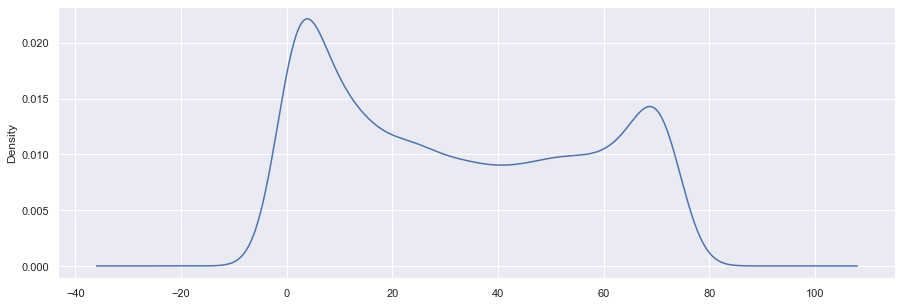

In [72]:
ax = plt.subplots(figsize=(15,5)) 
TelcomCustomerChurn1.tenure.plot(kind='density') 

<AxesSubplot:ylabel='Density'>

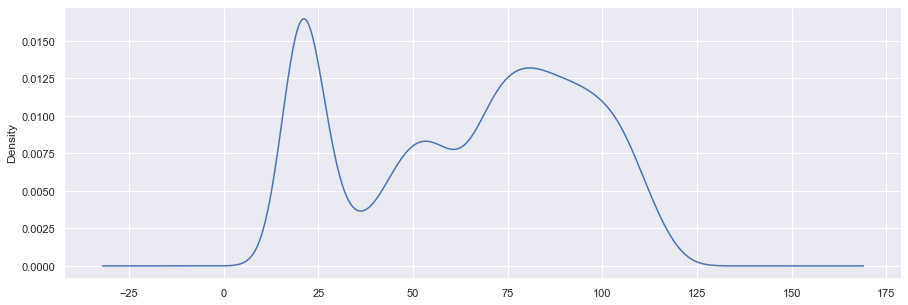

In [73]:
ax = plt.subplots(figsize=(15,5)) 
TelcomCustomerChurn1.MonthlyCharges.plot(kind='density') 

<AxesSubplot:ylabel='Density'>

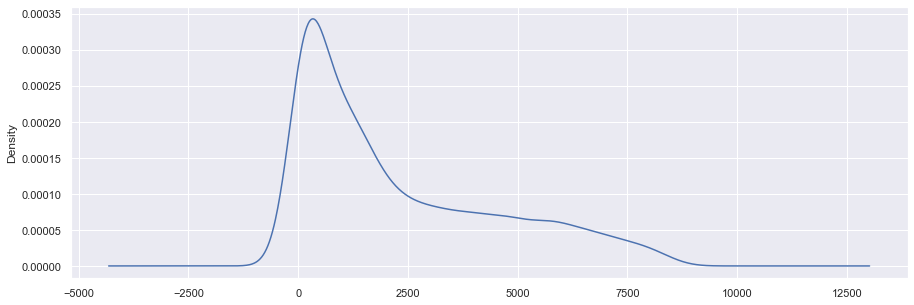

In [74]:
ax = plt.subplots(figsize=(15,5)) 
TelcomCustomerChurn1.TotalCharges.plot(kind='density') 

In [75]:
# None of the three numerical variables follow a normal distribution 

In [76]:
# We will use StandardScaler in order to standardise the numerical variables
# We won't standardise the encoded categorical variables. StandardScaler outputs positive or negative float 
# Hence, we won't apply StandardScaler on categorical variables as the as the label column must be a positive Integer 
# StandardScaler makes the mean of the distribution approximately 0 and standard deviation 1

In [77]:
X = TelcomCustomerChurn1.drop(['customerID','Churn'], axis=1)
Y = TelcomCustomerChurn1['Churn']
# split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)
# copy of datasets
X_train_standard = X_train.copy()
X_test_standard = X_test.copy() 
# numerical features
num_cols = ['tenure','MonthlyCharges','TotalCharges']
# apply standardization on numerical features
for i in num_cols:
    # fit on training data column
    scale = StandardScaler().fit(X_train_standard[[i]])
    # transform the training data column
    X_train_standard[i] = scale.transform(X_train_standard[[i]])
    # transform the testing data column
    X_test_standard[i] = scale.transform(X_test_standard[[i]])

In [78]:
# Training data: 80% of the total data (80%*7043 = 5634)
X_train_standard 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2338,1,0,1,1,1.613062,1,0,2,1,1,1,1,1,1,2,0,0,-1.492048,-0.426060
4705,1,0,0,0,-1.075464,1,0,1,2,2,0,0,0,0,0,1,2,0.470826,-0.792927
3514,1,0,1,1,1.124239,1,2,1,2,0,2,2,2,2,2,1,2,1.523791,1.906580
1549,1,0,0,0,-1.279140,1,0,0,0,0,0,0,0,0,0,1,3,-0.630379,-0.991937
5757,0,1,1,0,-0.179289,1,2,2,1,1,1,1,1,1,0,0,3,-1.300751,-0.686731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5699,1,0,0,0,-0.708847,1,0,1,0,0,2,0,2,0,0,0,2,0.682084,-0.471702
2550,0,0,1,1,0.961298,1,0,2,1,1,1,1,1,1,2,0,3,-1.488721,-0.529198
537,0,0,1,1,0.024388,1,0,0,2,2,2,0,0,0,1,1,3,-0.211190,-0.145757
1220,1,0,0,0,-0.627376,1,2,0,2,0,0,0,0,2,0,0,0,0.031674,-0.519848


In [79]:
# Part A 3(A)
# Train a model using XGBoost. Also print best performing parameters along with train and test performance.

In [80]:
# Model (Predicting using test data after fitting with training data)
xgb_model = XGBClassifier()
# Fiting the XGBoost model 
xgb_model.fit(X_train_standard,Y_train) 
# predict the response
Y_pred = xgb_model.predict(X_test_standard) 

In [81]:
# evaluate predictions
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.63%


In [82]:
# Evalation metrics 
df_table = metrics.confusion_matrix(Y_test, Y_pred, labels=[1, 0])
a = (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1])
p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
f = (2 * p * r) / (p + r)
print("accuracy : ",round(a,2))
print("precision: ",round(p,2))
print("recall   : ",round(r,2))
print("F1 score : ",round(f,2))

accuracy :  0.8
precision:  0.83
recall   :  0.9
F1 score :  0.87


In [83]:
# Model (Predicting using training data after fitting with training data)
xgb_model = XGBClassifier()  
# Fiting the XGBoost model 
xgb_model.fit(X_train_standard,Y_train) 
# predict the response
Y_pred_1 = xgb_model.predict(X_train_standard) 

In [84]:
# evaluate predictions
accuracy = accuracy_score(Y_train, Y_pred_1)  
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.23%


In [85]:
# Evalation metrics 
df_table_1 = metrics.confusion_matrix(Y_train, Y_pred_1, labels=[1, 0])
a = (df_table_1[0,0] + df_table_1[1,1]) / (df_table_1[0,0] + df_table_1[0,1] + df_table_1[1,0] + df_table_1[1,1])
p = df_table_1[1,1] / (df_table_1[1,1] + df_table_1[0,1])
r = df_table_1[1,1] / (df_table_1[1,1] + df_table_1[1,0])
f = (2 * p * r) / (p + r)
print("accuracy : ",round(a,2))
print("precision: ",round(p,2))
print("recall   : ",round(r,2))
print("F1 score : ",round(f,2))

accuracy :  0.94
precision:  0.95
recall   :  0.97
F1 score :  0.96


In [86]:
X1 = TelcomCustomerChurn1.drop(['customerID','Churn'], axis=1)
Y1 = TelcomCustomerChurn1['Churn']
# copy of datasets
X1 = X1.copy()
# numerical features
num_cols = ['tenure','MonthlyCharges','TotalCharges']
# apply standardization on numerical features
for i in num_cols:
    # fit on numerical data column
    scale = StandardScaler().fit(X1[[i]])
    # transform the numerical data column
    X1[i] = scale.transform(X1[[i]])

In [87]:
# K-Fold cross validation on whole dataset 
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
results = cross_val_score(xgb_model, X1,Y1, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 78.59% (0.74%)


In [88]:
xgb_model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [89]:
# # Part A 3(B)
# Improve performance of the XGBoost as much as possible. Also print best performing parameters along with 
# train and test performance

In [132]:
# Solution
# Distributed Asynchronous Hyper-parameter Optimization using HyperOpt. It is based on Bayesian Optimization and supported by the 
# SMBO (Sequential Model-Based Global Optimization)
# define objective function 
def hyperparameter_tuning(params):
    clf = XGBClassifier(**params)
    acc = cross_val_score(clf,X_train_standard,Y_train,scoring="accuracy").mean()
    return {"loss": -acc, "status": STATUS_OK}
# HyperOpt minimizes the function, that's why, acc is preceded by a negative sign

Search_space = {
    'max_depth' : hp.choice('max_depth', range(5, 30, 1)),
    'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.01),
    'n_estimators' : hp.choice('n_estimators', range(20, 205, 5)),
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    'gamma' : hp.quniform('gamma', 0, 0.50, 0.01),
    'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
    'subsample' : hp.quniform('subsample', 0.1, 1, 0.01),
    'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.01)
}

trials = Trials()

# fmin function : Optimization function  
# tpe : Tree Parzen Estimators

best = fmin(
    fn=hyperparameter_tuning,
    space = Search_space, 
    algo=tpe.suggest, 
    max_evals=500,  
    trials=trials
)

print("Best: {}".format(best))

100%|██████████| 500/500 [48:23<00:00,  5.81s/trial, best loss: -0.8056450659652231]  
Best: {'colsample_bytree': 0.5700000000000001, 'gamma': 0.45, 'learning_rate': 0.06, 'max_depth': 24, 'min_child_weight': 10.0, 'n_estimators': 30, 'reg_alpha': 0.2352198306309863, 'reg_lambda': 0.7388710833598566, 'subsample': 0.12}


In [119]:
# After performing hyperparameter optimization, the loss is -0.8056 meaning that the model performance has 
# an accuracy of 80.56% by using 'colsample_bytree': 0.5700000000000001, 'gamma': 0.45, 'learning_rate': 0.06, 
# 'max_depth': 24, 'min_child_weight': 10.0, 'n_estimators': 30, 'reg_alpha': 0.2352198306309863, 
#'reg_lambda': 0.7388710833598566, 'subsample': 0.12

In [134]:
# Using the best performing parameters on evaluating the performance of train and test data
# New XGB Classifier named xgb1 with the best performing parameters 

In [135]:
xgb1 = XGBClassifier(
 learning_rate =0.06,
 n_estimators=30,
 max_depth=24,
 max_delta_step=0,
 min_child_weight=10.0,
 gamma=0.45,
 subsample=0.12,
 colsample_bylevel=1,
 colsample_bynode=1,
 colsample_bytree=0.5700000000000001,
 objective='binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 use_label_encoder=True,
 base_score=0.5,
 booster='gbtree',
 enable_categorical=False,
 gpu_id=-1,
 importance_type=None,
 n_jobs=4,
 num_parallel_tree=1,
 predictor='auto',
 random_state=0,
 reg_alpha=0.2352198306309863,
 reg_lambda=0.7388710833598566,
 tree_method='exact',
 validate_parameters=1,
 interaction_constraints='',
 monotone_constraints='()',
 verbosity=None)

In [136]:
xgb1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5700000000000001,
              enable_categorical=False, gamma=0.45, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.06, max_delta_step=0, max_depth=24,
              min_child_weight=10.0, missing=nan, monotone_constraints='()',
              n_estimators=30, n_jobs=4, nthread=4, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0.2352198306309863,
              reg_lambda=0.7388710833598566, scale_pos_weight=1, subsample=0.12,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [137]:
# Using different notations for variables 
X2 = TelcomCustomerChurn1.drop(['customerID','Churn'], axis=1)
Y2 = TelcomCustomerChurn1['Churn']
# split into train and test
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=7)
# copy of datasets
X2_train_standard = X2_train.copy()
X2_test_standard = X2_test.copy() 
# numerical features
num_cols = ['tenure','MonthlyCharges','TotalCharges']
# apply standardization on numerical features
for i in num_cols:
    # fit on training data column
    scale = StandardScaler().fit(X2_train_standard[[i]])
    # transform the training data column
    X2_train_standard[i] = scale.transform(X2_train_standard[[i]])
    # transform the testing data column
    X2_test_standard[i] = scale.transform(X2_test_standard[[i]])

In [138]:
# Model (Predicting using test data) 
# Fiting the XGBoost model with the best parameters  
xgb1.fit(X2_train_standard,Y2_train) 
# predict the response
Y2_pred = xgb1.predict(X2_test_standard) 

In [139]:
# evaluate predictions
accuracy = accuracy_score(Y2_test, Y2_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.62%


In [140]:
# Evalation metrics 
df_table2 = metrics.confusion_matrix(Y2_test, Y2_pred, labels=[1, 0])
a = (df_table2[0,0] + df_table2[1,1]) / (df_table2[0,0] + df_table2[0,1] + df_table2[1,0] + df_table2[1,1])
p = df_table2[1,1] / (df_table2[1,1] + df_table2[0,1])
r = df_table2[1,1] / (df_table2[1,1] + df_table2[1,0])
f = (2 * p * r) / (p + r)
print("accuracy : ",round(a,2))
print("precision: ",round(p,2))
print("recall   : ",round(r,2))
print("F1 score : ",round(f,2))

accuracy :  0.81
precision:  0.83
recall   :  0.92
F1 score :  0.87


In [141]:
# Model (Predicting using training data )  
# Fiting the XGBoost model 
xgb1.fit(X2_train_standard,Y2_train) 
# predict the response
Y2_pred_1 = xgb1.predict(X2_train_standard) 

In [142]:
# evaluate predictions
accuracy = accuracy_score(Y2_train,Y2_pred_1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.67%


In [143]:
# Evalation metrics 
df_table3 = metrics.confusion_matrix(Y2_train, Y2_pred_1, labels=[1, 0])
a = (df_table3[0,0] + df_table3[1,1]) / (df_table3[0,0] + df_table3[0,1] + df_table3[1,0] + df_table3[1,1])
p = df_table3[1,1] / (df_table3[1,1] + df_table3[0,1])
r = df_table3[1,1] / (df_table3[1,1] + df_table3[1,0])
f = (2 * p * r) / (p + r)
print("accuracy : ",round(a,2))
print("precision: ",round(p,2))
print("recall   : ",round(r,2))
print("F1 score : ",round(f,2))

accuracy :  0.81
precision:  0.83
recall   :  0.92
F1 score :  0.88


In [102]:
# Comparison 
# Baseline model: 
# On Test Data
# Accuracy:79.63%, Precision:83%, Recall:90%, F1 score:87% 
# On Training data
# Accuracy:94.23%, Precision:95%, Recall:97%, F1 score:96% 

# Optimised model: 
# On Test Data
# Accuracy:80.62%, Precision:83%, Recall:92%, F1 score:87% 
# On Training data  
# Accuracy:80.67%, Precision:83%, Recall:92%, F1 score:88% 

# In terms of accuracy score, the model performance on both training data and test data are approximately same (80.6%)
# in the case of Optimised model 

# Baseline model with an accuracy score of 94% on training data looks like an overfit model but its performance on test data 
# (approx. 80%) is almost similar to that of the optimised model 

In [103]:
# Part B
# Domain: IT
# CONTEXT: The purpose is to build a machine learning workflow that will work autonomously irrespective of Data and users 
# can save efforts involved in building workflows for each dataset.

In [104]:
# Solution
# Machine Learning Workflow 
# 1. Gathering data
# 2. Data pre-processing
# 3. Researching the model that will be best for the type of data
# 4. Training and testing the model
# 5. Evaluation

In [105]:
# For automating the workflow, I will use  
# 1. TPOT (Tree-based Pipeline Optimization Tool). TPOT is a Python Automated Machine Learning tool that optimizes 
# machine learning pipelines using genetic programming.  

In [106]:
# Tree-based Pipeline Optimization Tool, TPOT

In [107]:
Data = TelcomCustomerChurn

In [108]:
# Data pre-processing 
# Here, we found an anomaly in TotalCharges datatype undetected by isnull() function. 
# Ideally, it should have been Float but it was idenifed as Object datatype. 
# Upon closer inspection, I found that the TotalCharges column has blank data which Python was unable to detect as null values.
# That may have resulted in TotalCharges datatype being tagged as Object in lieu of Float. 
# Hence, besides isnull() functon, I recommend manual checking of dataset in order to remove any discrepancy.  

In [109]:
# Pre-processing
Data1 = Data.replace(r'^\s*$', np.nan, regex=True)
# Imputation
imputer = SimpleImputer(strategy='median', missing_values=np.nan)
imputer = imputer.fit(Data1[['TotalCharges']])
Data1[['TotalCharges']] = imputer.transform(Data1[['TotalCharges']])
# Encoding
Data1['gender'] = class_label_encoder.fit_transform(Data1['gender'])
Data1['Partner'] = class_label_encoder.fit_transform(Data1['Partner'])
Data1['Dependents'] = class_label_encoder.fit_transform(Data1['Dependents'])
Data1['PhoneService'] = class_label_encoder.fit_transform(Data1['PhoneService'])
Data1['MultipleLines'] = class_label_encoder.fit_transform(Data1['MultipleLines'])
Data1['InternetService'] = class_label_encoder.fit_transform(Data1['InternetService'])
Data1['OnlineSecurity'] = class_label_encoder.fit_transform(Data1['OnlineSecurity'])
Data1['OnlineBackup'] = class_label_encoder.fit_transform(Data1['OnlineBackup'])
Data1['DeviceProtection'] = class_label_encoder.fit_transform(Data1['DeviceProtection'])
Data1['TechSupport'] = class_label_encoder.fit_transform(Data1['TechSupport'])
Data1['StreamingTV'] = class_label_encoder.fit_transform(Data1['StreamingTV'])
Data1['StreamingMovies'] = class_label_encoder.fit_transform(Data1['StreamingMovies'])
Data1['Contract'] = class_label_encoder.fit_transform(Data1['Contract'])
Data1['PaperlessBilling'] = class_label_encoder.fit_transform(Data1['PaperlessBilling'])
Data1['PaymentMethod'] = class_label_encoder.fit_transform(Data1['PaymentMethod'])
Data1['Churn'] = class_label_encoder.fit_transform(Data1['Churn'])

In [110]:
X = Data1.drop(['customerID','Churn'], axis=1)
Y = Data1['Churn']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7) 
X_train_1 = X_train.copy()
X_test_1 = X_test.copy() 
num_cols = ['tenure','MonthlyCharges','TotalCharges']
# Scaling 
for i in num_cols:
    scale = StandardScaler().fit(X_train_1[[i]])
    X_train_1[i] = scale.transform(X_train_1[[i]])  
    X_test_1[i] = scale.transform(X_test_1[[i]])

In [111]:
from tpot import TPOTClassifier 
from sklearn.datasets import load_digits
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import PolynomialFeatures
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

In [112]:
tpot_data = Data1
features = X_train_1 
target = Y_train
training_features, testing_features, training_target, testing_target = train_test_split(features, target, random_state=42)

In [113]:
# Automating the ML workflow post pre-processing 
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train_1, Y_train)
print(tpot.score(X_test_1, Y_test))
tpot.export('tpot_Model_pipeline.py')

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8008512200926396

Generation 2 - Current best internal CV score: 0.8028069301703228

Generation 3 - Current best internal CV score: 0.8028069301703228

Generation 4 - Current best internal CV score: 0.8028069301703228

Generation 5 - Current best internal CV score: 0.8028069301703228

Best pipeline: LinearSVC(LinearSVC(input_matrix, C=15.0, dual=False, loss=squared_hinge, penalty=l2, tol=0.01), C=0.1, dual=False, loss=squared_hinge, penalty=l1, tol=0.1)
0.8076650106458482


In [114]:
# On exporting the 'tpot_Model_pipeline.py' from above, we get the below pipeline used in TPOT 

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.svm import LinearSVC
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=42)

exported_pipeline = make_pipeline(
    StackingEstimator(estimator=LinearSVC(C=15.0, dual=False, loss="squared_hinge", penalty="l2", tol=0.01)),
    LinearSVC(C=0.1, dual=False, loss="squared_hinge", penalty="l1", tol=0.1)
)

set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


In [115]:
# Scikit Learn's Pipeline 

In [187]:
Data = TelcomCustomerChurn
Data2 = Data.replace(r'^\s*$', np.nan, regex=True)
imputer = SimpleImputer(strategy='median', missing_values=np.nan)
imputer = imputer.fit(Data2[['TotalCharges']])
Data2[['TotalCharges']] = imputer.transform(Data2[['TotalCharges']])

class MultiColumn(BaseEstimator, TransformerMixin):
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode
    def fit(self,X,Y=None):
        return self
    def transform(self, X):                                     
        return X[self.columns]

Data2.drop(columns=['customerID'],inplace=True)
X = Data2.drop('Churn', axis=1)
Y = Data2['Churn']
Y = LabelEncoder().fit_transform(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=7)

transformers = []

# Numerical and Categorical columns in the Dataframe 
numeric = ['tenure','MonthlyCharges','TotalCharges','SeniorCitizen'] # Datatype: Int64 
categorical = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
            'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract',
            'PaperlessBilling','PaymentMethod']

class Imputation(BaseEstimator, TransformerMixin):
    def transform(self, X, Y=None, **fit_params):
        return X.fillna(NUMERIC.median())
    def fit_transform(self, X, Y=None, **fit_params):
        self.fit(X, Y, **fit_params)
        return self.transform(X)
    def fit(self, X, Y=None, **fit_params):
        return self

class Cat(BaseEstimator, TransformerMixin):
    def transform(self, X, Y=None, **fit_params):
        Scaler = StandardScaler()
        Scaler1 = Scaler.fit(numeric)
        Scaler1_data = Scaler1.transform(numeric)
        Scaler1_data[np.isnan(Scaler1_data)] = 1
        return Scaler1_data

    def transform(self, X, Y=None, **fit_params):    
        Encoder = LabelEncoder()
        Encoder1 = Encoderr.fit(categorical)
        Encoder1_data = Encoder1.transform(categorical)
        return Encoder1_data
    
    def fit(self, X, y=None, **fit_params):
        return self

In [188]:
pipeline = Pipeline([

# Use FeatureUnion to combine the features
('union', FeatureUnion(
    transformer_list=[
                # numeric
        ('numeric', Pipeline([
        ('selector', MultiColumn(columns=['tenure','MonthlyCharges','TotalCharges','SeniorCitizen'])),
        ('imputing', SimpleImputer(strategy ='median')),
        ('scaling', preprocessing.StandardScaler())
        ])),
         # categorical
        ('categorical', Pipeline([
            ('selector', MultiColumn(columns=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService',
                                              'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                                              'StreamingMovies','Contract','PaperlessBilling','PaymentMethod'])),
            ('Encoding', LabelEncoder())
        ])),

    ])),


 ('model_fitting', xgb.XGBClassifier()),
])